In [32]:
# first neural network with keras tutorial
from numpy import loadtxt
from pandas import read_csv
#from pandas import read_
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.models import Model,load_model

In [33]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.data.txt', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [34]:
print(X.shape)
print(y.shape)
print(type(X))

(768, 8)
(768,)
<class 'numpy.ndarray'>


In [35]:
print(y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [36]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
#from keral.optimizer import adam
model.compile(loss='binary_crossentropy', optimizer='RMSProp' , metrics=['accuracy'])#categorical_crossentropy
print(model.summary())
plot_model(model, show_shapes=True, to_file='model1.png')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                108       
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


param_number = output_channel_number * (input_channel_number + 1)

In [37]:
# fit the keras model on the dataset
history=model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
77/77 [==============================] - 1s 2ms/step - loss: 4.2658 - accuracy: 0.4961
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 1.2617 - accuracy: 0.6042
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 1.0177 - accuracy: 0.6393
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.9136 - accuracy: 0.6562
Epoch 5/100
77/77 [==============================] - 0s 1ms/step - loss: 0.8757 - accuracy: 0.6406
Epoch 6/100
77/77 [==============================] - 0s 1ms/step - loss: 0.8193 - accuracy: 0.6693
Epoch 7/100
77/77 [==============================] - 0s 1ms/step - loss: 0.7970 - accuracy: 0.6562
Epoch 8/100
77/77 [==============================] - 0s 1ms/step - loss: 0.7587 - accuracy: 0.6758
Epoch 9/100
77/77 [==============================] - 0s 1ms/step - loss: 0.7321 - accuracy: 0.6823
Epoch 10/100
77/77 [==============================] - 0s 2ms/step - loss: 0.7392 - accuracy: 0.6680
Epoch 11/

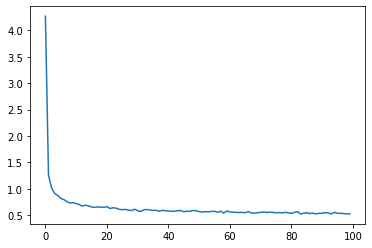

In [38]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])

In [39]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.6615
Accuracy: 66.15


In [40]:
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(10):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 0 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)


Epoch 1/100
61/62 [============================>.] - ETA: 0s - loss: 0.5071 - accuracy: 0.7623
Epoch 00001: val_accuracy improved from -inf to 0.69481, saving model to best_model.h5
62/62 [==============================] - 1s 6ms/step - loss: 0.5112 - accuracy: 0.7606 - val_loss: 0.6480 - val_accuracy: 0.6948
Epoch 2/100
59/62 [===========================>..] - ETA: 0s - loss: 0.5095 - accuracy: 0.7627
Epoch 00002: val_accuracy did not improve from 0.69481
62/62 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7638 - val_loss: 0.7467 - val_accuracy: 0.6558
Epoch 3/100
36/62 [================>.............] - ETA: 0s - loss: 0.4717 - accuracy: 0.7667
Epoch 00003: val_accuracy improved from 0.69481 to 0.71429, saving model to best_model.h5
62/62 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7443 - val_loss: 0.5737 - val_accuracy: 0.7143
Epoch 4/100
33/62 [==============>...............] - ETA: 0s - loss: 0.4743 - accuracy: 0.7576
E

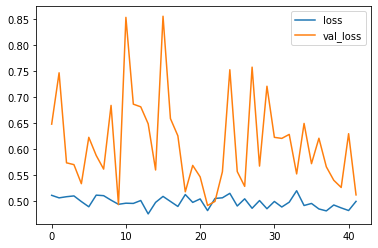

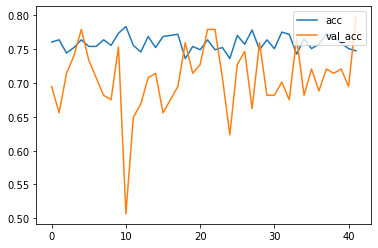

In [43]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(X, y, epochs=100, batch_size=10, verbose=1, validation_split=0.2,callbacks=[mc,es]) #validation_data=[test_x, test_y]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'], loc='upper right')
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'], loc='upper right')

In [44]:
model=load_model('best_model.h5')
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

24/24 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.7969
Accuracy: 79.69
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)
